In [19]:
import pandas as pd
import numpy as np

#plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Time and Day import
 #from daytime import datetime, date as dt
import datetime as dt
import calendar

In [4]:
#import data into file
df = pd.read_csv("Sierra's_Health.csv")
df


,Date,Active Energy Burned(Cal),Resting Energy burned(Cal),Distance Walking / Running(km),Flights Climbed(Count),Step Count(Count)
0,2022-02-28,NaN,NaN,1.939,5.0,2876
1,2022-03-01,NaN,NaN,3.628,9.0,5051
2,2022-03-02,NaN,NaN,4.117,15.0,6020
3,2022-03-03,NaN,NaN,3.227,4.0,4378
4,2022-03-04,NaN,NaN,3.933,4.0,5658
...,...,...,...,...,...,...
360,2023-02-23,142.568,1713.470,3.061,7.0,4996
361,2023-02-24,157.202,1703.307,3.207,8.0,4962
362,2023-02-25,125.520,1705.148,2.926,3.0,4535
363,2023-02-26,51.998,1684.212,0.891,4.0,1363


In [5]:
#observing the dataframe
df.head()

,Date,Active Energy Burned(Cal),Resting Energy burned(Cal),Distance Walking / Running(km),Flights Climbed(Count),Step Count(Count)
0,2022-02-28,NaN,NaN,1.939,5.0,2876
1,2022-03-01,NaN,NaN,3.628,9.0,5051
2,2022-03-02,NaN,NaN,4.117,15.0,6020
3,2022-03-03,NaN,NaN,3.227,4.0,4378
4,2022-03-04,NaN,NaN,3.933,4.0,5658


In [6]:
df.tail()

,Date,Active Energy Burned(Cal),Resting Energy burned(Cal),Distance Walking / Running(km),Flights Climbed(Count),Step Count(Count)
360,2023-02-23,142.568,1713.470,3.061,7.0,4996
361,2023-02-24,157.202,1703.307,3.207,8.0,4962
362,2023-02-25,125.520,1705.148,2.926,3.0,4535
363,2023-02-26,51.998,1684.212,0.891,4.0,1363
364,2023-02-27,95.601,1686.796,1.681,7.0,2560


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            365 non-null    object 
 1   Active Energy Burned(Cal)       157 non-null    float64
 2   Resting Energy burned(Cal)      160 non-null    float64
 3   Distance Walking / Running(km)  365 non-null    float64
 4   Flights Climbed(Count)          363 non-null    float64
 5   Step Count(Count)               365 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 17.2+ KB


In [8]:
df.shape


(365, 6)

<AxesSubplot:xlabel='Day_of_week'>

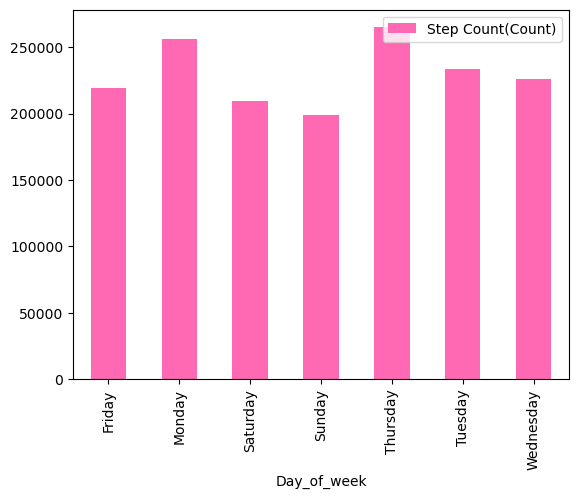

In [9]:
#Added a new column called "Day of week"  to see the day of the week that I took a walk on 

df['Date'] = pd.to_datetime(df['Date'])

df['Day_of_week'] = df['Date'].dt.day_name()

#plot bar graph
steps_df = df.filter('Date')
step= df.filter(items=['Day_of_week', 'Step Count(Count)'])

df_sum = step.groupby('Day_of_week').sum()
colour = ('hotpink')
df_sum.plot(kind='bar', color=colour)


In [30]:
df_sum


,Step Count(Count)
Day_of_week,
Friday,219261
Monday,256154
Saturday,209527
Sunday,199141
Thursday,265027
Tuesday,233863
Wednesday,226038


In [29]:
df_mean = step.groupby('Day_of_week').mean()
df_mean
#.plot(kind='bar', color=colour)

,Step Count(Count)
Day_of_week,
Friday,4216.557692
Monday,4833.094340
Saturday,4029.365385
Sunday,3829.634615
Thursday,5096.673077
Tuesday,4497.365385
Wednesday,4346.884615


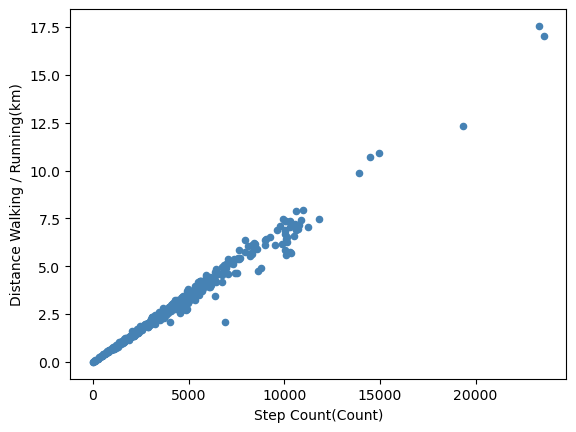

In [11]:
#Scatterplot 

colors = np.array(["steelblue"])

df.plot(kind = 'scatter', x = 'Step Count(Count)', y = 'Distance Walking / Running(km)', c=colors)

plt.show()

/Users/sierrawhonder/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


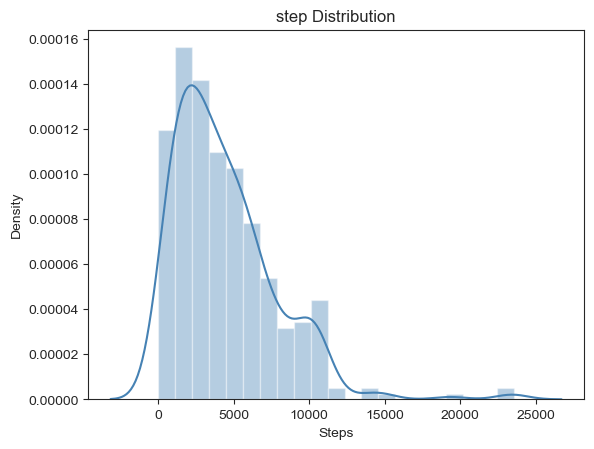

In [18]:
sns.set_style("ticks")
sns.distplot(step['Step Count(Count)'], color = 'steelblue')
plt.title("step Distribution")
plt.xlabel("Steps")
plt.show()
             



In [17]:
#Clean Data 
df.drop_duplicates(inplace=True)

df = df.dropna()
df

,Date,Active Energy Burned(Cal),Resting Energy burned(Cal),Distance Walking / Running(km),Flights Climbed(Count),Step Count(Count),Day_of_week
205,2022-09-21,120.691,855.017,7.115,8.0,10652,Wednesday
206,2022-09-22,222.384,1523.186,6.146,10.0,8492,Thursday
207,2022-09-23,177.410,1510.195,4.861,5.0,6856,Friday
208,2022-09-24,145.574,1604.771,3.455,7.0,4960,Saturday
209,2022-09-25,149.376,1701.635,3.499,2.0,5571,Sunday
...,...,...,...,...,...,...,...
360,2023-02-23,142.568,1713.470,3.061,7.0,4996,Thursday
361,2023-02-24,157.202,1703.307,3.207,8.0,4962,Friday
362,2023-02-25,125.520,1705.148,2.926,3.0,4535,Saturday
363,2023-02-26,51.998,1684.212,0.891,4.0,1363,Sunday


In [25]:
#Heat map

Corr_Matrix = round(df.corr(),2)
print(Corr_Matrix)

                                Active Energy Burned(Cal)  \
Active Energy Burned(Cal)                            1.00   
Resting Energy burned(Cal)                           0.34   
Distance Walking / Running(km)                       0.96   
Flights Climbed(Count)                               0.65   
Step Count(Count)                                    0.93   

                                Resting Energy burned(Cal)  \
Active Energy Burned(Cal)                             0.34   
Resting Energy burned(Cal)                            1.00   
Distance Walking / Running(km)                        0.23   
Flights Climbed(Count)                                0.17   
Step Count(Count)                                     0.24   

                                Distance Walking / Running(km)  \
Active Energy Burned(Cal)                                 0.96   
Resting Energy burned(Cal)                                0.23   
Distance Walking / Running(km)                            1.00

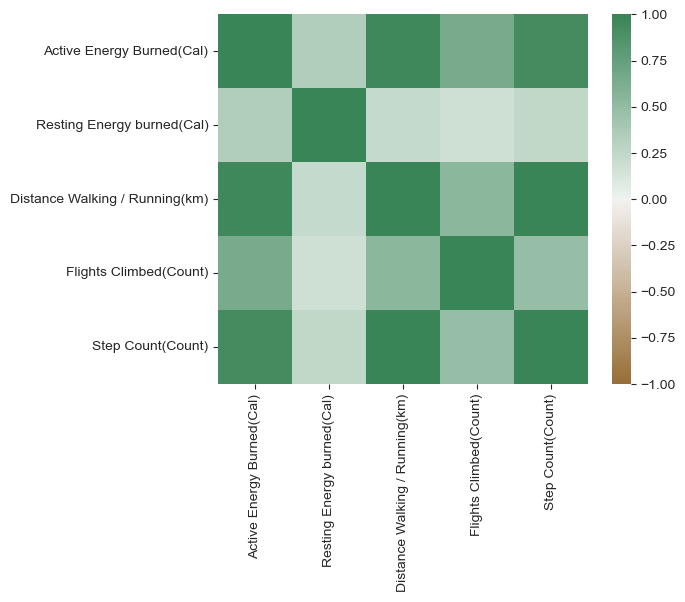

In [26]:
correlation_full_health = df.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

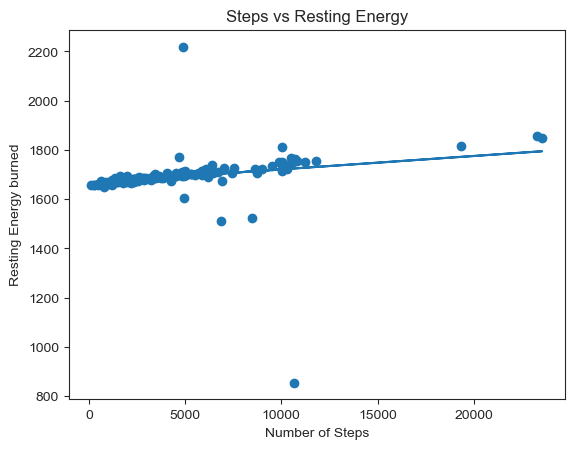

In [41]:
#Linear regression between the number of stair flights and resting energy



x = df['Step Count(Count)']
y = df['Resting Energy burned(Cal)']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Number of Steps")
plt.ylabel ("Resting Energy burned")
plt.title('Steps vs Resting Energy')
plt.show()


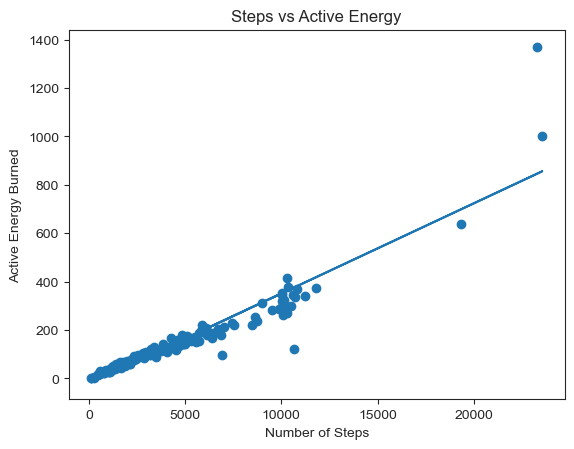

In [42]:
#Linear regression between the number of steps and active energy



x = df['Step Count(Count)']
y = df['Active Energy Burned(Cal)']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Number of Steps")
plt.ylabel ("Active Energy Burned")
plt.title('Steps vs Active Energy')
plt.show()

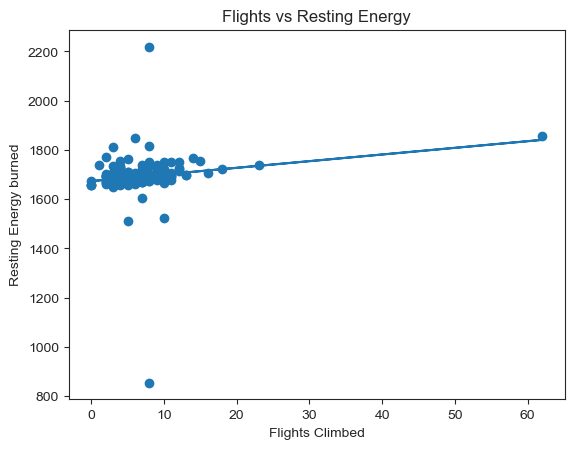

In [43]:
#Linear regression between the number of stair flights and resting energy


x = df['Flights Climbed(Count)']
y = df['Resting Energy burned(Cal)']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Flights Climbed")
plt.ylabel ("Resting Energy burned")
plt.title('Flights vs Resting Energy')
plt.show()
plt.show()

